In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.datasets import make_hastie_10_2

In [3]:
# import scaler function to scale numerical features
from sklearn.preprocessing import StandardScaler as ss

In [4]:
# import metrices from sklearn 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.model_selection import train_test_split

In [4]:
# import PCA
from sklearn.decomposition import PCA

In [5]:
data1=pd.read_csv("data.csv")

In [140]:
data1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
data1.shape

(569, 33)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


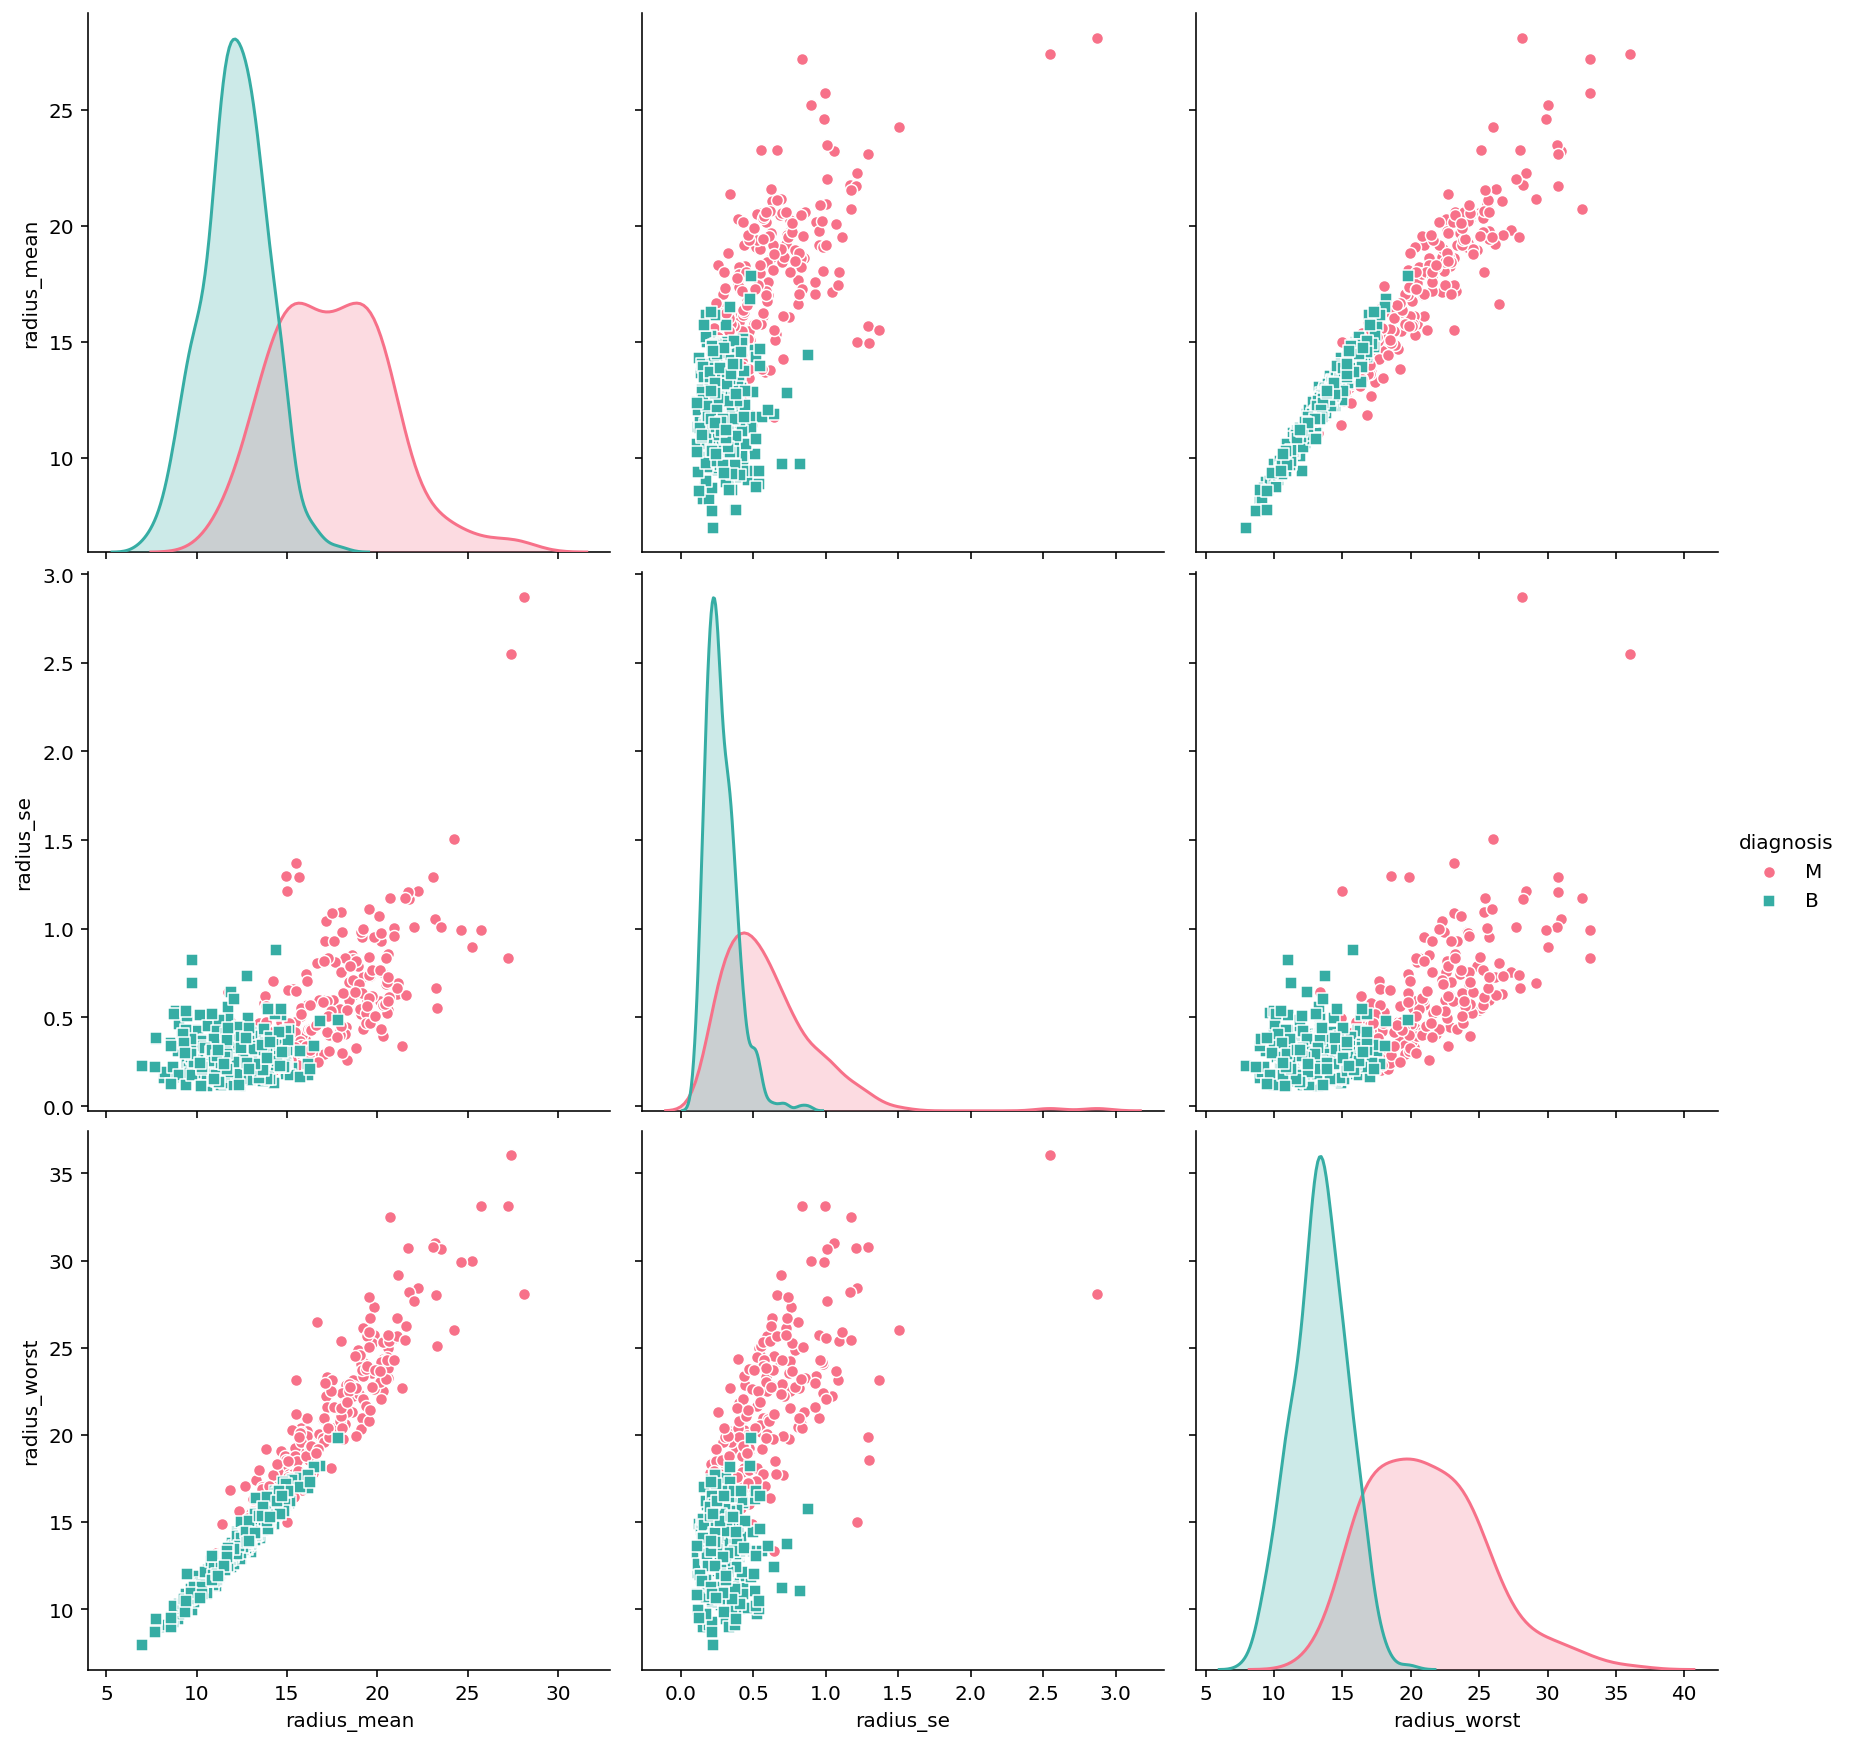

In [10]:
#Visulization
df=pd.read_csv("data.csv")
radius = df[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],size=4)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


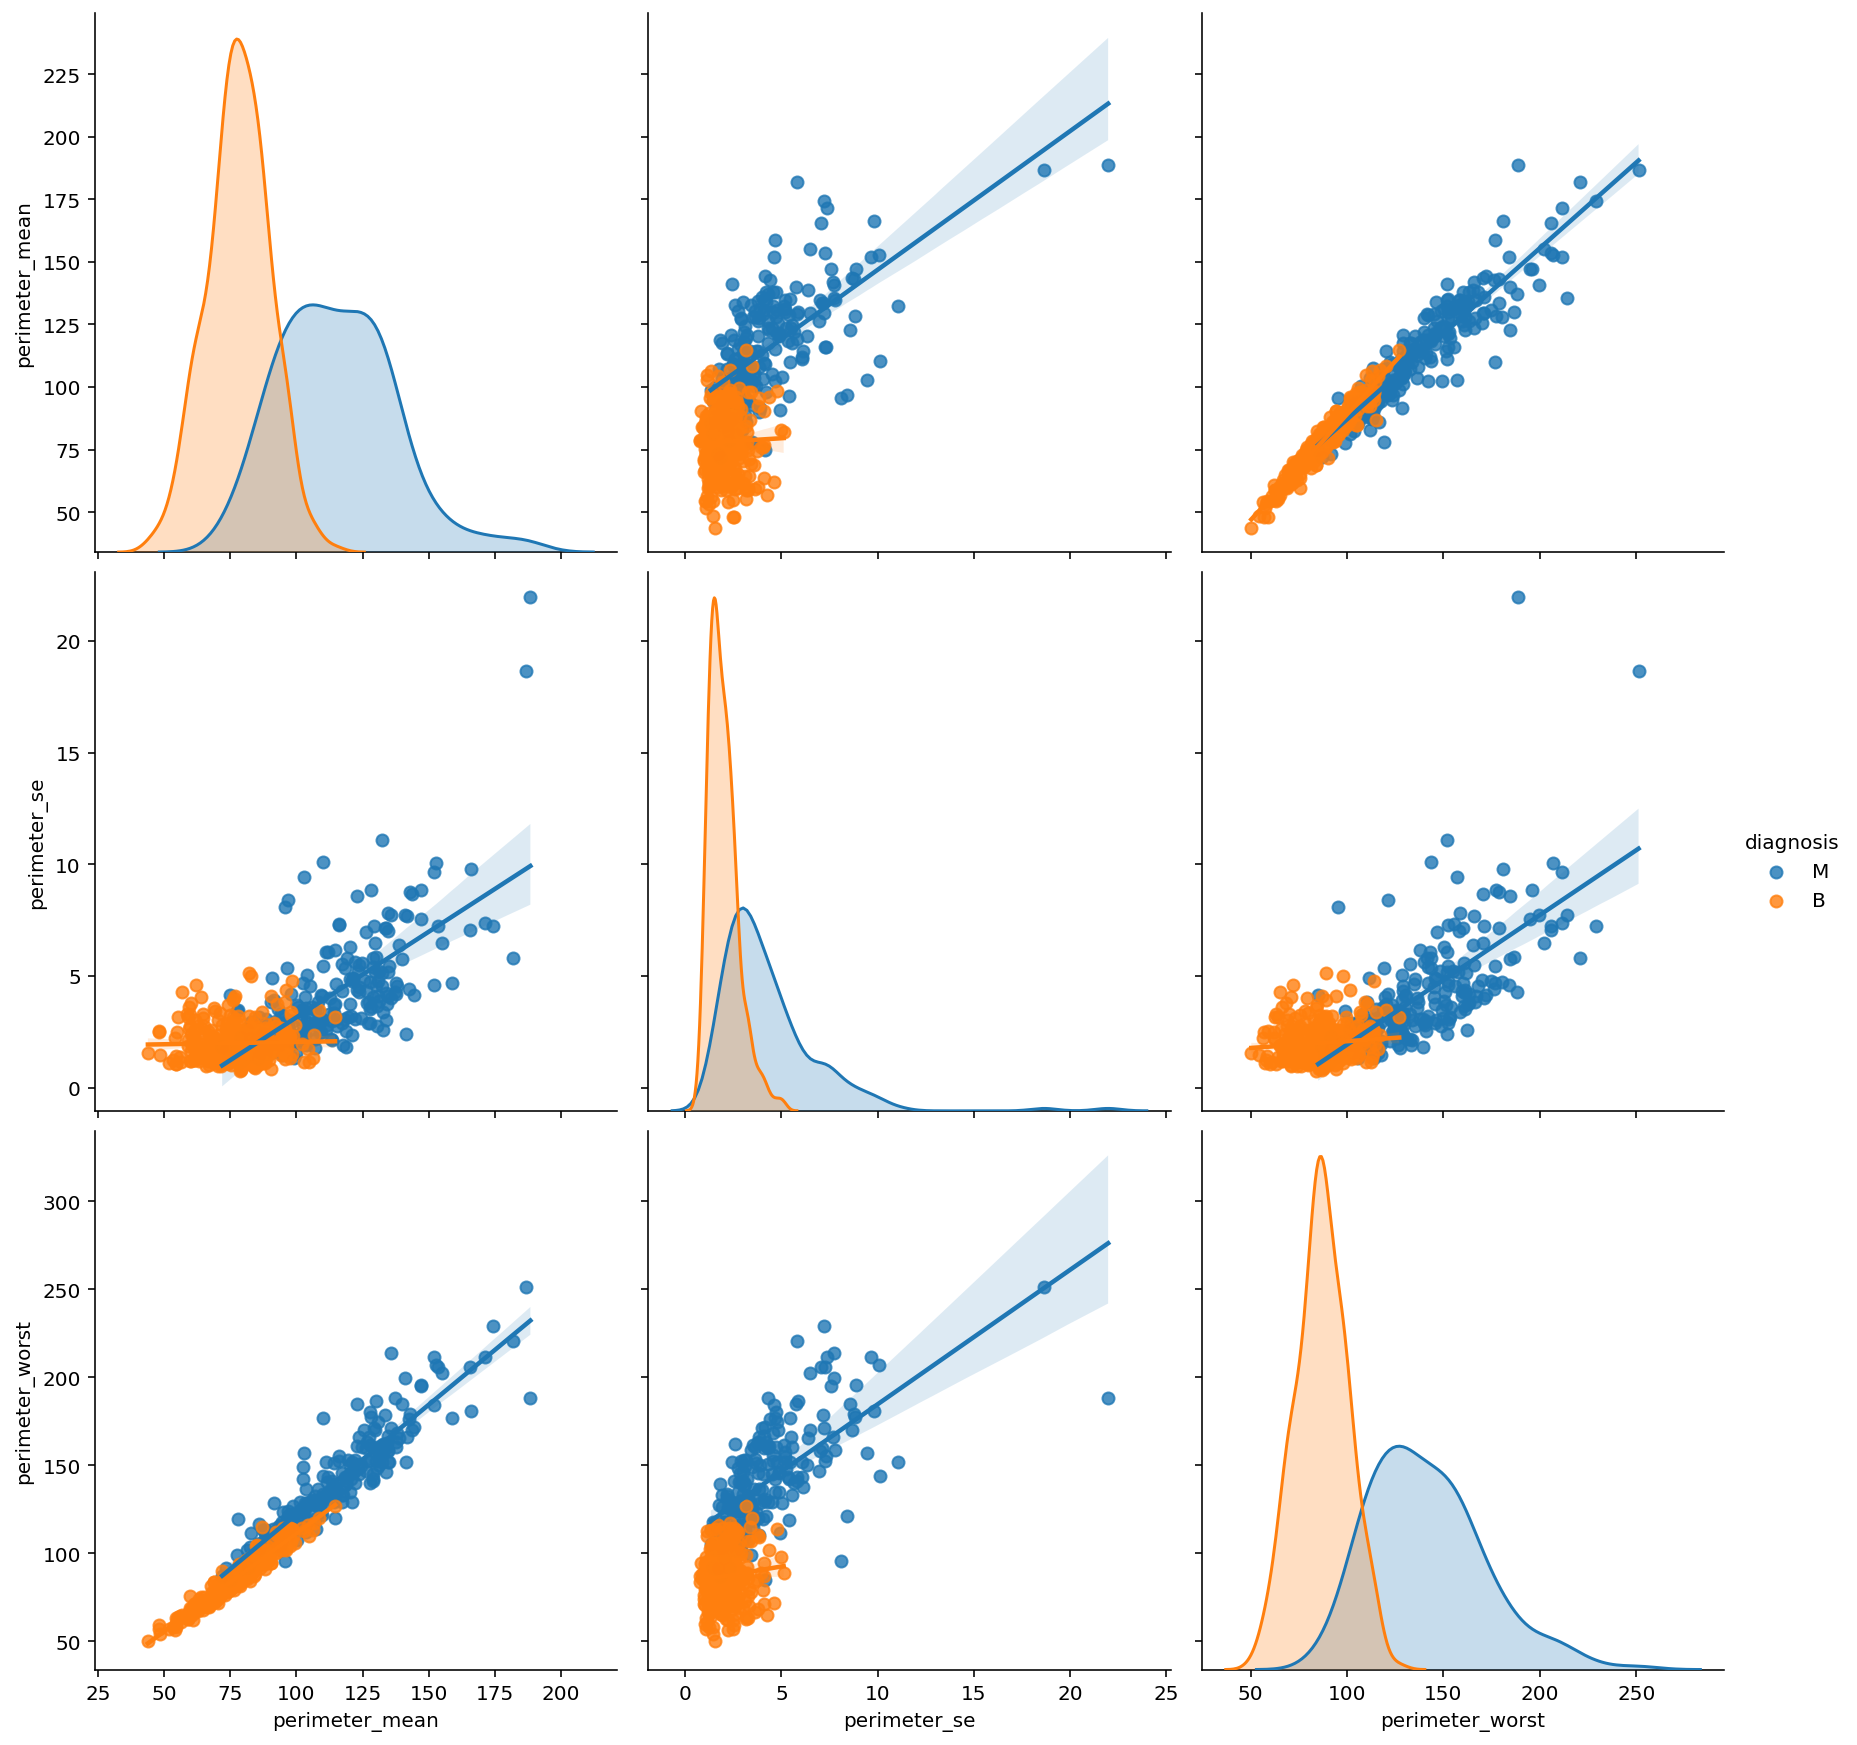

In [11]:
#Perimeter visulization 
perimeter = df[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
sns.pairplot(perimeter, hue='diagnosis', size = 4, kind="reg")

IndexError: index 15 is out of bounds for axis 0 with size 15

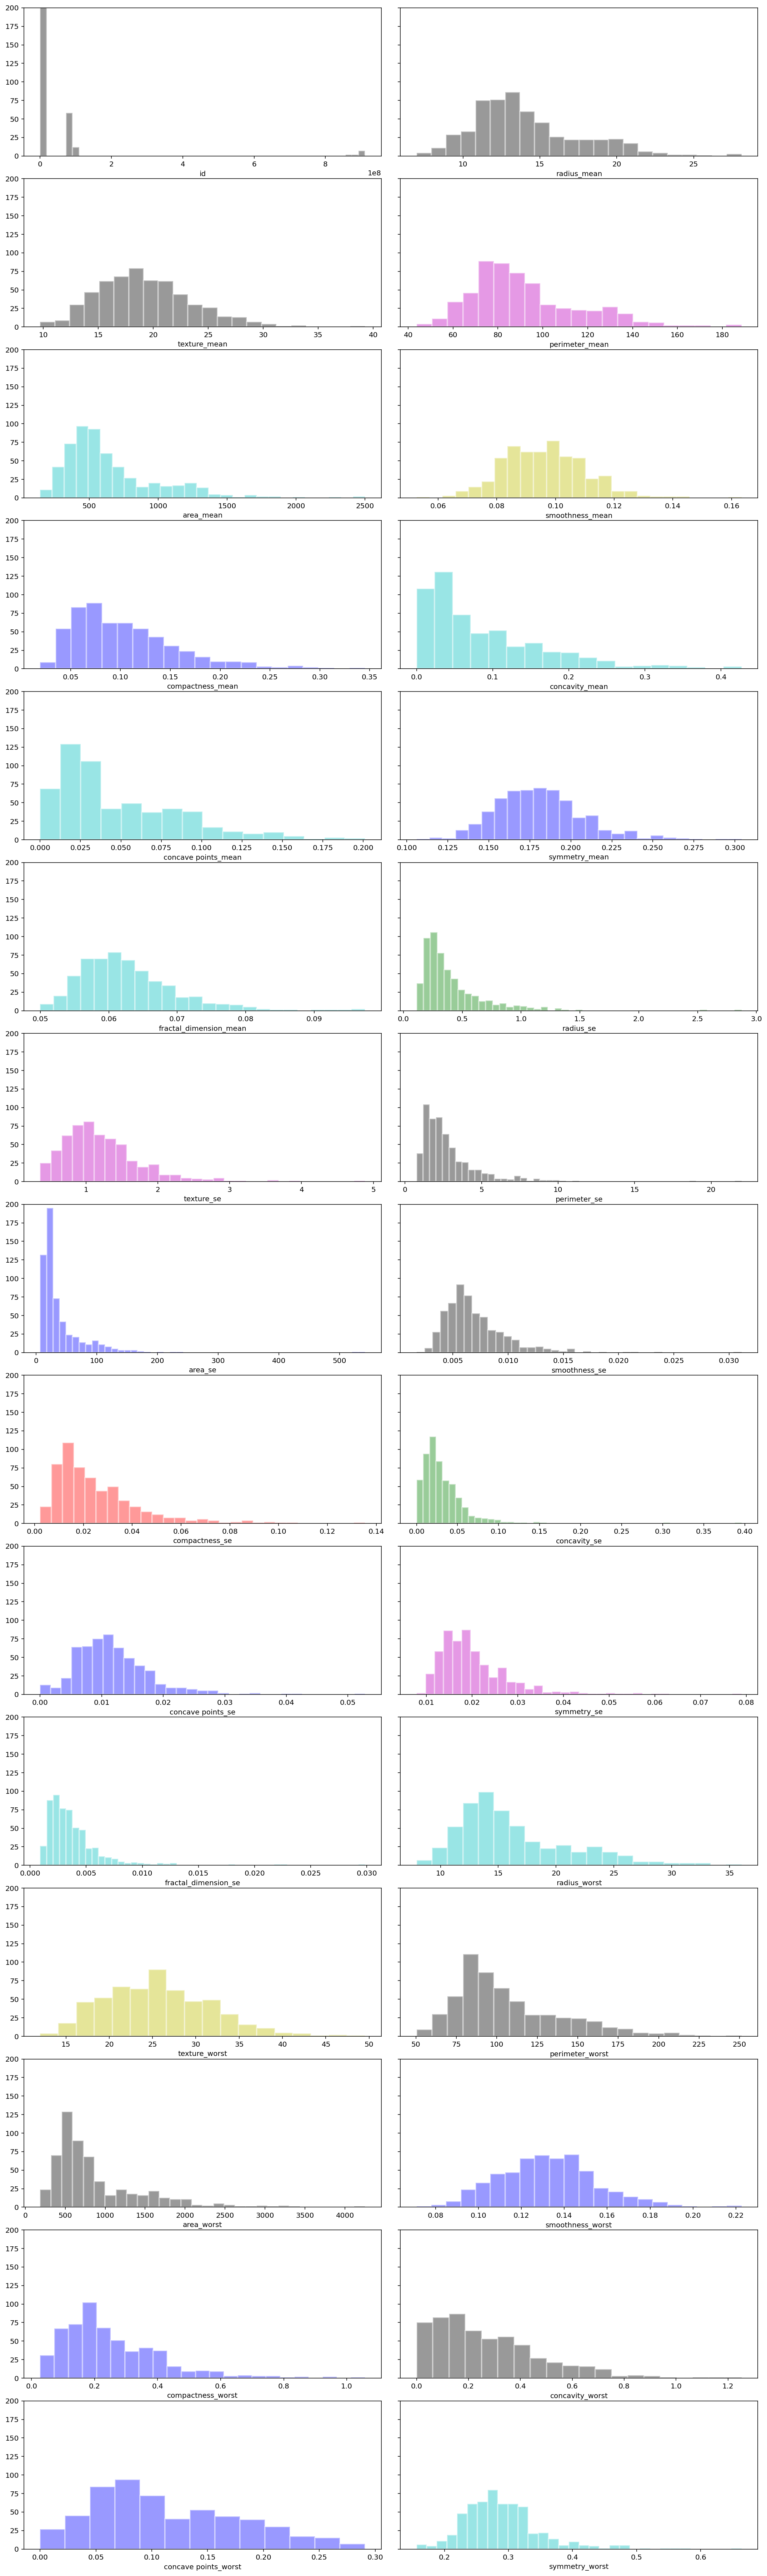

In [13]:
#Histogram Visulization
end = df['diagnosis']
df.drop(labels=['diagnosis'], axis=1,inplace = True)
df.insert(30, 'diagnosis', end)
df.head()

def categorical_to_numeric_diagnosis(x):
    if x=='M':
        return 1
    if x=='B':
        return 0

df['diagnosis']= df['diagnosis'].apply(categorical_to_numeric_diagnosis)
df["diagnosis"].value_counts()


colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =15,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(df.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(df[df.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

In [7]:
data1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [144]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data=data1.columns

In [9]:
data

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [0]:
# Dropping of null values and unnecessary columns from dataset i.e., column 32 contains null values and column 0 contains id. 

In [10]:
data=data1.drop(['id','Unnamed: 32'], axis=1)

In [11]:
data.shape

(569, 31)

In [12]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# The main of this project is to predict whether a breast cancer cell is malignant or benign. For that separate target and predictors so, diagnosis act as target while other columns act as predictors i.e., 30 columns.

In [13]:
P= data.loc[: , 'radius_mean': 'fractal_dimension_worst']
Q= data.loc[:, 'diagnosis']

In [14]:
P

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
Q

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [0]:
# map values in target column with 0 and 1. Here B is considered as 0 while M is considered as 1.

In [16]:
data['diagnosis'].replace('M', 1,inplace=True)
data['diagnosis'].replace('B', 0,inplace=True)

In [17]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [0]:
# With the help of sklearn's StandardScaler class scale all numerical features in x 

In [18]:
scale=ss()
P=scale.fit_transform(P)

In [19]:
P

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [0]:
# Performing PCA on numeric type of columns 

In [20]:
pca=PCA()
out=pca.fit_transform(P)
out.shape

(569, 30)

In [0]:
# Calculate or find the variance of each columns in predictors 

In [21]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [0]:
# Find the cumulative sum of every column and with the help of this we can decide how many PCs are needed to get desired variance. Here the variance is considered as .95.

In [22]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [0]:
# Assign first 10 columns of 'out' to Final_data. 'out' has the fit as well as transformed values after that PCA of featured columns is performed

In [23]:
Final_data= out[:, :10]

In [24]:
Final_data.shape

(569, 10)

In [25]:
Final_data[:5,:]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012,
         1.41142445,  2.15936987, -0.39840723, -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177498,
         0.02865635,  0.01335809,  0.24098846, -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208267, -0.1770859 ,
         0.54145215, -0.66816648,  0.09737374,  0.02406564,  0.4542754 ],
       [ 7.1229532 , 10.27558912, -3.23278955,  0.15254703, -2.9608784 ,
         3.05342182,  1.4299107 ,  1.05956524, -1.40543967, -1.11697527],
       [ 3.93530207, -1.94807157,  1.38976673,  2.94063935,  0.5467474 ,
        -1.22649464, -0.93621255,  0.63637606, -0.26380546,  0.37770447]])

In [0]:
# Now, we need to make new dataframe with 10 PCs as predictors & with target column. This will be considered as new data file. We are creating dataframe using values in Final_data via column names as PC1 through PC10. 'Target' as target column.

In [26]:
pcdf=pd.DataFrame(data=Final_data, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])

In [27]:
pcdf['target']=data['diagnosis']

In [28]:
pcdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,1


In [0]:
# In new file we need to separate P (Predictors) and Q (target). Now, these 10 PCs will be new predictors.

In [29]:
P=pcdf.loc[:, 'pc1':'pc10']
Q=pcdf.loc[:,'target']

In [30]:
P.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


In [31]:
Q.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [32]:
P_train, P_test, Q_train, Q_test = train_test_split(P, Q, test_size = 0.2, shuffle=True)

In [33]:
P_train.shape

(455, 10)

In [34]:
P_test.shape

(114, 10)

In [35]:
Q_train.shape

(455,)

In [36]:
Q_test.shape

(114,)

In [0]:
# Now we will use various classifier model for prediction.

In [0]:
# DecisionTreeClassifier

In [37]:
DTC= DecisionTreeClassifier()

In [ ]:
# Train data using data in P_train, Q_train

In [38]:
DTC1= DTC.fit(P_train, Q_train)

In [39]:
Q_pred_DTC=DTC1.predict(P_test)
Q_pred_DTC

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1])

In [ ]:
# Prediction on test data

In [40]:
Q_pred_DTC_prob= DTC1.predict_proba(P_test)

In [41]:
print(accuracy_score(Q_test,Q_pred_DTC))

0.9122807017543859


In [ ]:
# confusion matrix

In [42]:
confusion_matrix(Q_test,Q_pred_DTC)
tn,fp,fn,tp= confusion_matrix(Q_test,Q_pred_DTC).flatten()

In [43]:
fpr_DTC, tpr_DTC, thresholds = roc_curve(Q_test, Q_pred_DTC_prob[:,1],pos_label=1)

In [44]:
p_DTC,r_DTC,f_DTC,_ = precision_recall_fscore_support(Q_test,Q_pred_DTC)
p_DTC, r_DTC,f_DTC

(array([0.92957746, 0.88372093]),
 array([0.92957746, 0.88372093]),
 array([0.92957746, 0.88372093]))

In [45]:
print(auc(fpr_DTC,tpr_DTC))


0.9066491975106452


In [0]:
# RandomForestClassifier

In [46]:
RF=RandomForestClassifier(n_estimators=100)

In [47]:
RF1=RF.fit(P_train,Q_train)

In [48]:
Q_pred_RF=RF1.predict(P_test)
Q_pred_RF

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1])

In [49]:
Q_pred_RF_prob=RF1.predict_proba(P_test)

In [50]:
print(accuracy_score(Q_test,Q_pred_RF))

0.9122807017543859


In [52]:
confusion_matrix(Q_test,Q_pred_RF)
tn,fp,fn,tp=confusion_matrix(Q_test,Q_pred_RF).flatten()

In [53]:
fpr_RF,tpr_RF,thresholds=roc_curve(Q_test,Q_pred_RF_prob[:,1],pos_label=1)

In [54]:
p_RF,r_RF,f_RF,_= precision_recall_fscore_support(Q_test,Q_pred_RF)
p_RF,r_RF,f_RF

(array([0.92957746, 0.88372093]),
 array([0.92957746, 0.88372093]),
 array([0.92957746, 0.88372093]))

In [55]:
print(auc(fpr_RF,tpr_RF))

0.9634785456927611


In [0]:
#GradientBoostingClassifier

In [56]:
GBM= GradientBoostingClassifier()

In [57]:
GBM1= GBM.fit(P_train,Q_train)

In [58]:
Q_pred_GBM=GBM1.predict(P_test)
Q_pred_GBM

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1])

In [59]:
Q_pred_GBM_prob=GBM1.predict_proba(P_test)

In [60]:
print(accuracy_score(Q_test,Q_pred_GBM))

0.9298245614035088


In [61]:
confusion_matrix(Q_test,Q_pred_GBM)
tn,fp,fn,tp= confusion_matrix(Q_test,Q_pred_GBM).flatten()

In [62]:
fpr_GBM,tpr_GBM,thresholds = roc_curve(Q_test,Q_pred_GBM_prob[:,1],pos_label=1)

In [63]:
p_GBM,r_GBM,f_GBM,_ = precision_recall_fscore_support(Q_test,Q_pred_GBM)
p_GBM,r_GBM,f_GBM

(array([0.94366197, 0.90697674]),
 array([0.94366197, 0.90697674]),
 array([0.94366197, 0.90697674]))

In [64]:
print(auc(fpr_GBM,tpr_GBM))

0.9613494923026532


In [0]:
# ExtraTreesClassifier

In [65]:
ET=ExtraTreesClassifier()

In [66]:
ET1= ET.fit(P_train,Q_train)

In [67]:
Q_pred_ET=ET1.predict(P_test)
Q_pred_ET

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1])

In [68]:
Q_pred_ET_prob= ET1.predict_proba(P_test)

In [69]:
print(accuracy_score(Q_test,Q_pred_ET))

0.9298245614035088


In [70]:
confusion_matrix(Q_test,Q_pred_ET)
tn,fp,fn,tp = confusion_matrix(Q_test,Q_pred_ET).flatten()

In [71]:
fpr_ET, tpr_ET,thresholds = roc_curve(Q_test,Q_pred_ET_prob[:,1],pos_label=1)

In [72]:
p_ET,r_ET,f_ET,_ = precision_recall_fscore_support(Q_test,Q_pred_ET)
p_ET,r_ET,f_ET

(array([0.93150685, 0.92682927]),
 array([0.95774648, 0.88372093]),
 array([0.94444444, 0.9047619 ]))

In [73]:
print(auc(fpr_ET,tpr_ET))

0.9782181460858173


In [0]:
# KNeighborsClassifier

In [74]:
KNN= KNeighborsClassifier()

In [75]:
KNN1= KNN.fit(P_train,Q_train)

In [76]:
Q_pred_KNN = KNN1.predict(P_test)
Q_pred_KNN

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1])

In [77]:
Q_pred_KNN_prob = KNN1.predict_proba(P_test)

In [78]:
print (accuracy_score(Q_test,Q_pred_KNN))

0.9473684210526315


In [79]:
confusion_matrix(Q_test,Q_pred_KNN)
tn,fp,fn,tp = confusion_matrix(Q_test,Q_pred_KNN).flatten()

In [80]:
fpr_KNN, tpr_KNN, thresholds= roc_curve(Q_test,Q_pred_KNN_prob[:,1],pos_label=1)

In [81]:
p_KNN,r_KNN,f_KNN,_ = precision_recall_fscore_support(Q_test,Q_pred_KNN)
p_KNN, r_KNN,f_KNN

(array([0.93333333, 0.97435897]),
 array([0.98591549, 0.88372093]),
 array([0.95890411, 0.92682927]))

In [82]:
print(auc(fpr_KNN,tpr_KNN))

0.9472649852603996


In [0]:
# create window frame

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: Unrecognized location 'Lower right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


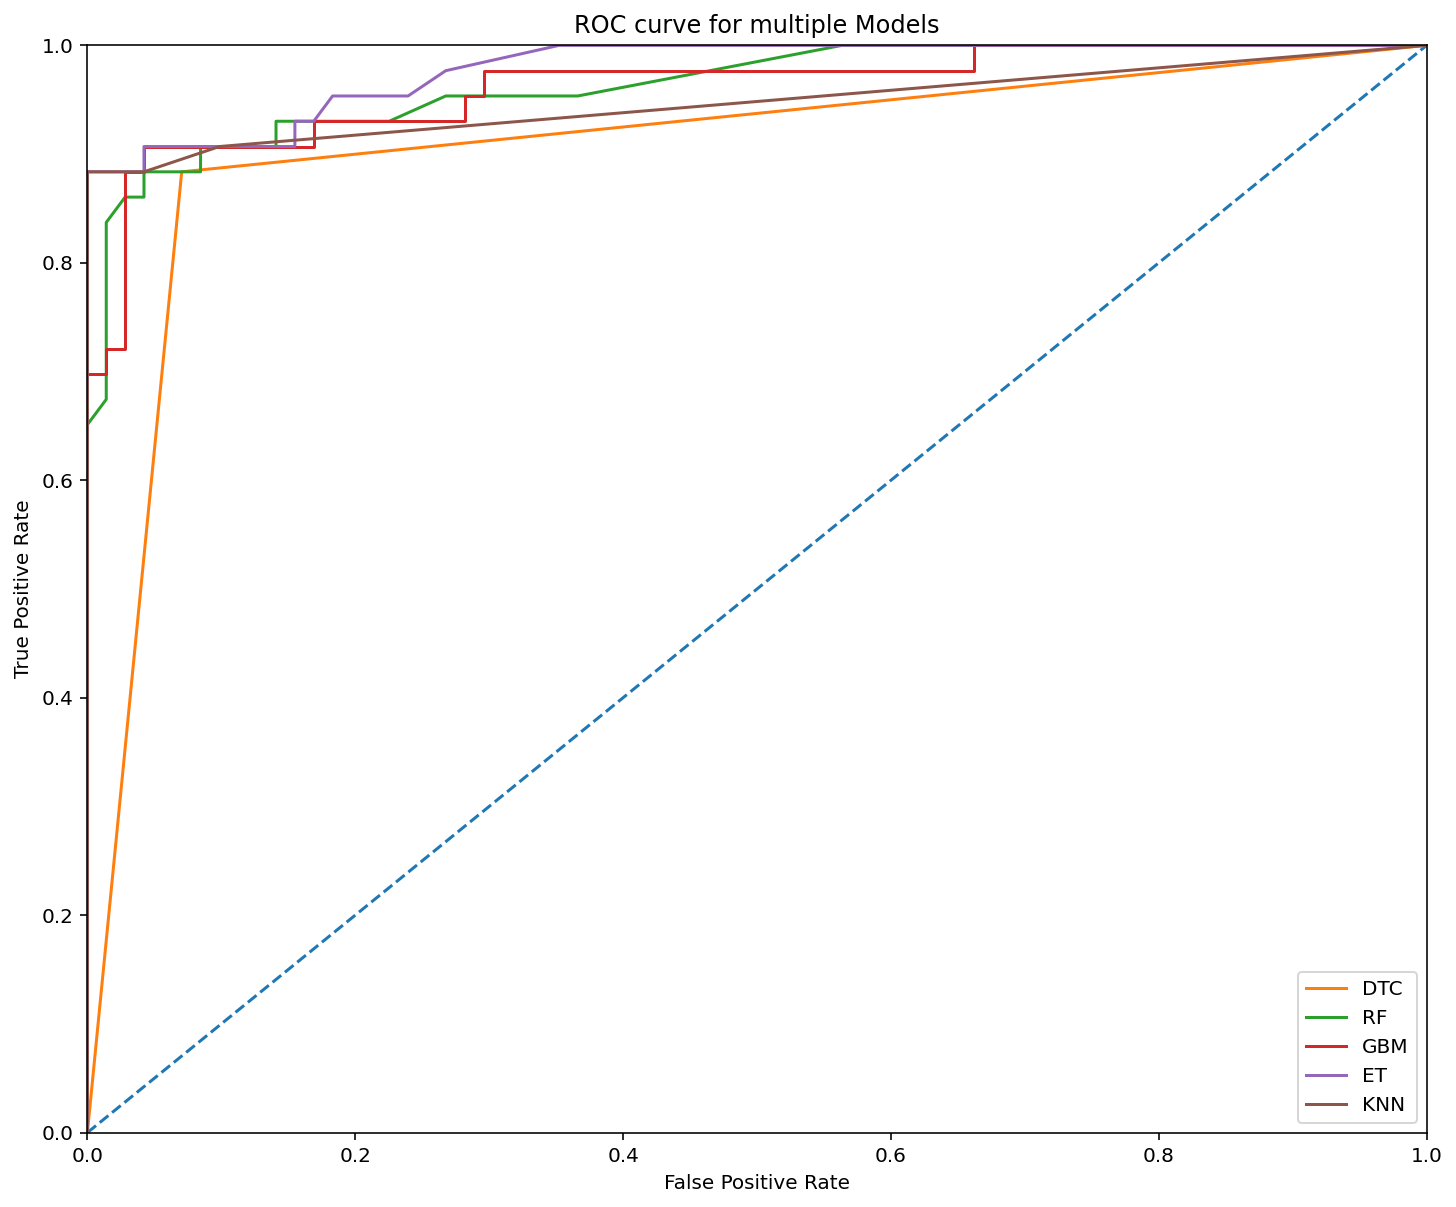

In [83]:
fig= plt.figure(figsize=(12,10))
Ax = fig.add_subplot(111)
Ax.plot([0,1], [0,1], ls="--")
Ax.set_xlabel('False Positive Rate')
Ax.set_ylabel('True Positive Rate')
Ax.set_title('ROC curve for multiple Models')
Ax.set_xlim([0.0,1.0])
Ax.set_ylim([0.0,1.0])
Ax.plot(fpr_DTC, tpr_DTC, label= "DTC")
Ax.plot(fpr_RF, tpr_RF, label= "RF")
Ax.plot(fpr_GBM, tpr_GBM, label= "GBM")
Ax.plot(fpr_ET, tpr_ET, label= "ET")
Ax.plot(fpr_KNN, tpr_KNN, label= "KNN")
Ax.legend(loc="Lower right")
plt.show()
